In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# step1:

In [2]:
df = pd.read_csv('boston.csv')

In [3]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

There is no incomplete data.

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.corr().abs()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621,0.388305
zn,0.200469,1.000000,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995,0.360445
indus,0.406583,0.533828,1.000000,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800,0.483725
chas,0.055892,0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929,0.175260
nox,0.420972,0.516604,0.763651,0.091203,1.000000,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879,0.427321
rm,0.219247,0.311991,0.391676,0.091251,0.302188,1.000000,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808,0.695360
age,0.352734,0.569537,0.644779,0.086518,0.731470,0.240265,1.000000,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339,0.376955
dis,0.379670,0.664408,0.708027,0.099176,0.769230,0.205246,0.747881,1.000000,0.494588,0.534432,0.232471,0.291512,0.496996,0.249929
rad,0.625505,0.311948,0.595129,0.007368,0.611441,0.209847,0.456022,0.494588,1.000000,0.910228,0.464741,0.444413,0.488676,0.381626
tax,0.582764,0.314563,0.720760,0.035587,0.668023,0.292048,0.506456,0.534432,0.910228,1.000000,0.460853,0.441808,0.543993,0.468536


Look at the largest absolute value of correlation between "medv" and others. And generally, lower status of population have less money to afford a home. The more lower status there are, the lower median value of owner occupied homes. We guess "lstat" is the most relevant attribute for MEDV.

# step2:

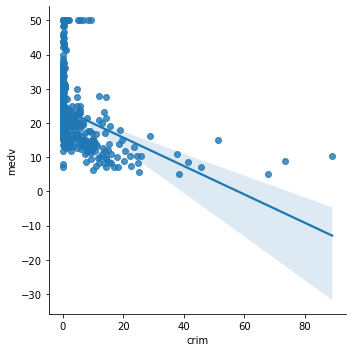

In [7]:
sns.lmplot(x='crim', y='medv',data=df)

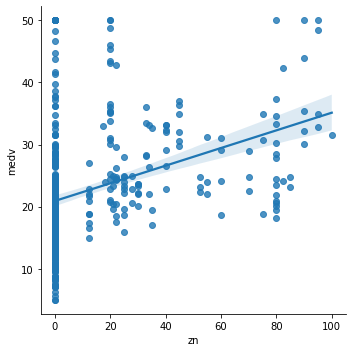

In [8]:
sns.lmplot(x='zn', y='medv',data=df)

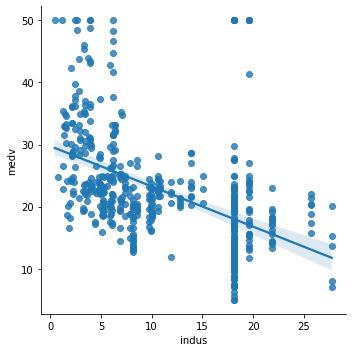

In [9]:
sns.lmplot(x='indus', y='medv',data=df)

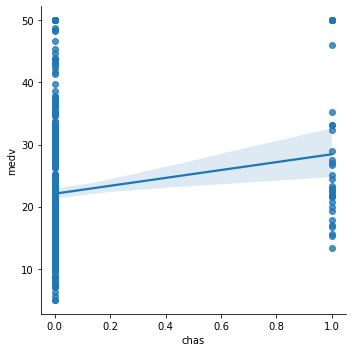

In [10]:
sns.lmplot(x='chas', y='medv',data=df)

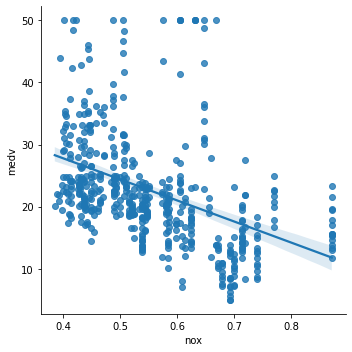

In [11]:
sns.lmplot(x='nox', y='medv',data=df)

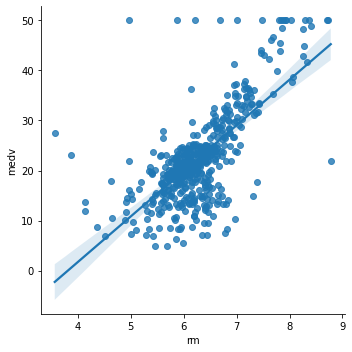

In [12]:
sns.lmplot(x='rm', y='medv',data=df)

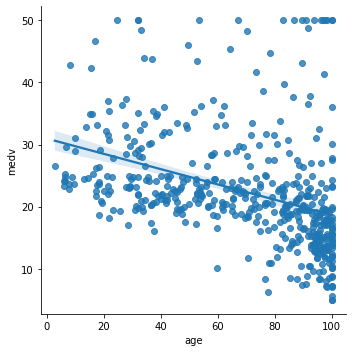

In [13]:
sns.lmplot(x='age', y='medv',data=df)

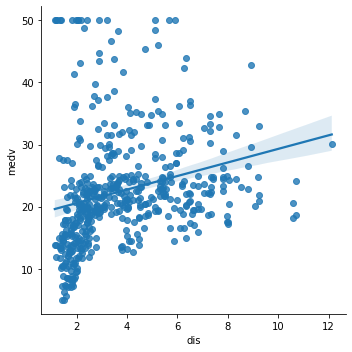

In [14]:
sns.lmplot(x='dis', y='medv',data=df)

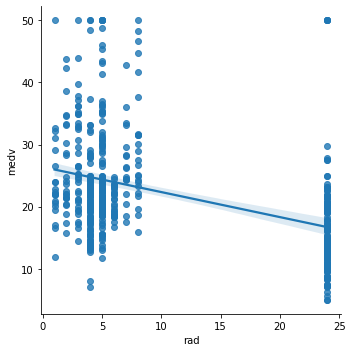

In [15]:
sns.lmplot(x='rad', y='medv',data=df)

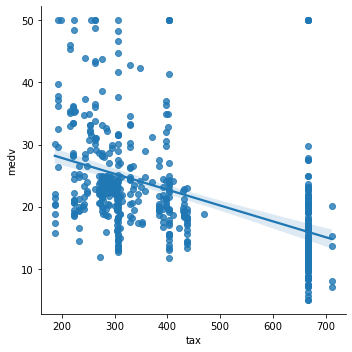

In [16]:
sns.lmplot(x='tax', y='medv',data=df)

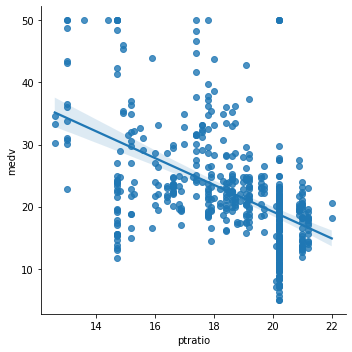

In [17]:
sns.lmplot(x='ptratio', y='medv',data=df)

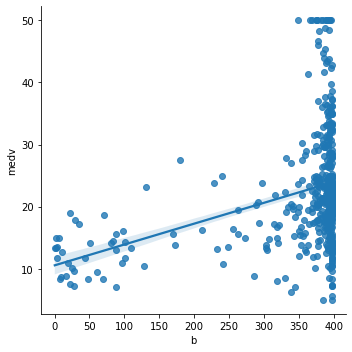

In [18]:
sns.lmplot(x='b', y='medv',data=df)

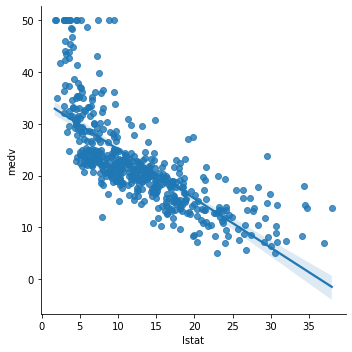

In [19]:
sns.lmplot(x='lstat', y='medv',data=df)

"lstat" is the most fittable with "medv".

# step3:

<AxesSubplot:>

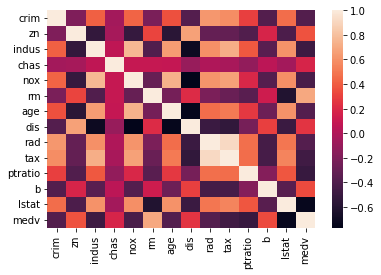

In [20]:
sns.heatmap(df.corr())

<AxesSubplot:>

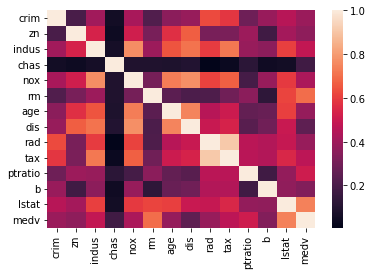

In [21]:
sns.heatmap(df.corr().abs())

We should find the large absolute value of correlation, namely, the color is shallow. We select "indus", "rm", "ptratio", "lstat".

# step4:

In [22]:
selectedData = df[['indus', 'rm','ptratio','lstat','medv']]
scaler = MinMaxScaler()
selectedData = scaler.fit_transform(selectedData)
selectedData  = pd.DataFrame(selectedData)
selectedData.columns = ['indus', 'rm','ptratio','lstat','medv']

<AxesSubplot:xlabel='indus', ylabel='medv'>

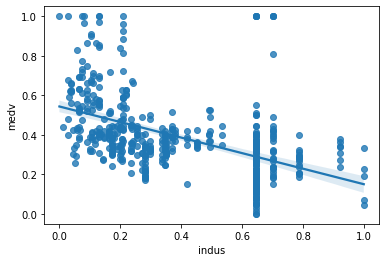

In [23]:
sns.regplot(x='indus', y='medv' ,data=selectedData, ci=95)

<AxesSubplot:xlabel='rm', ylabel='medv'>

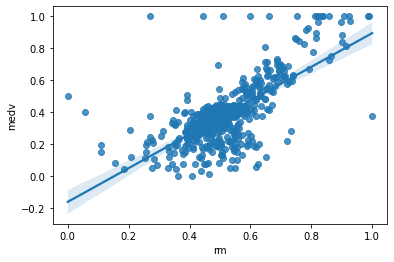

In [24]:
sns.regplot(x='rm', y='medv',data=selectedData, ci=95)

<AxesSubplot:xlabel='ptratio', ylabel='medv'>

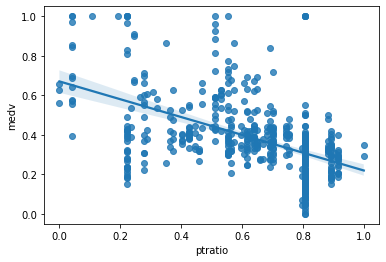

In [25]:
sns.regplot(x='ptratio', y='medv',data=selectedData, ci=95)

<AxesSubplot:xlabel='lstat', ylabel='medv'>

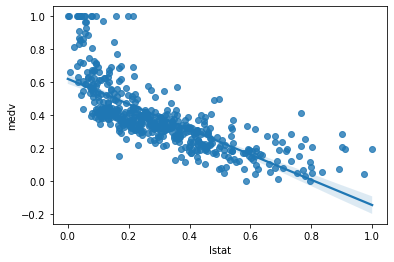

In [26]:
sns.regplot(x='lstat', y='medv',data=selectedData, ci=95)

# step5:

In [27]:
X = selectedData[['indus', 'rm', 'ptratio', 'lstat']]
y = selectedData['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)# separate the dataset
X_train = np.concatenate((np.ones((X_train.shape[0],1)),X_train), axis=1)# add a column with all ones
X_test = np.concatenate((np.ones((X_test.shape[0],1)),X_test), axis=1)# add a column with all ones

In [28]:
def GD(X,y,learningRate=0.0001,ite=100):
    w = np.zeros(X.shape[1])
    sampleNumber = y.shape[0]
    costList = []
    for i in range(ite):
        y_pred = X.dot(w)
        costList.append(np.sum((y_pred - y)**2)/(2*sampleNumber))
        gradient = X.T.dot(y_pred - y)
        w = w-learningRate*gradient
    return w,costList

In [29]:
w, costList = GD(X_train, y_train)
sampleNumber = y_train.shape[0]
testNumber = y_test.shape[0]
RMSE_train = np.sqrt(np.sum((X_train.dot(w) - y_train)**2)/sampleNumber)
RMSE_test = np.sqrt(np.sum((X_test.dot(w)- y_test)**2)/testNumber)
print('training error in terms of RMSE: ', RMSE_train)
print('testing error in terms of RMSE: ', RMSE_test) 

training error in terms of RMSE:  0.18955021655249835
testing error in terms of RMSE:  0.164121741109645


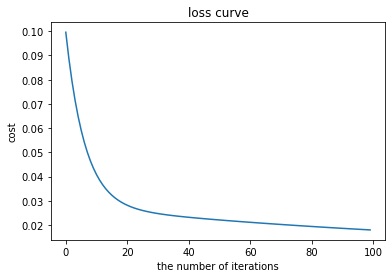

In [30]:
plt.plot(range(len(costList)), costList) 
plt.xlabel('the number of iterations') 
plt.ylabel('cost')
plt.title('loss curve')
plt.show()

# step6:

In [31]:
RMSE_train_list=[]
RMSE_test_list=[]
for stepSize in [0.00001, 0.0001, 0.001]:
    for iteration in [10, 100, 500, 1000]:
        w,costList = GD(X_train, y_train,stepSize, iteration)
        sampleNumber = y_train.shape[0]
        testNumber = y_test.shape[0]
        RMSE_train = np.sqrt(np.sum((X_train.dot(w) - y_train)**2)/sampleNumber)
        RMSE_test = np.sqrt(np.sum((X_test.dot(w)- y_test)**2)/testNumber)
        RMSE_train_list.append(RMSE_train)
        RMSE_test_list.append(RMSE_test)
        print("when stepSize is ", stepSize,", the times of iterations is ", iteration)
        print("training error in terms of RMSE: ", RMSE_train)
        print("testing error in terms of RMSE: ", RMSE_test)
        print()

when stepSize is  1e-05 , the times of iterations is  10
training error in terms of RMSE:  0.42207949971516906
testing error in terms of RMSE:  0.3890831259682921

when stepSize is  1e-05 , the times of iterations is  100
training error in terms of RMSE:  0.2886967970577309
testing error in terms of RMSE:  0.2528961281252281

when stepSize is  1e-05 , the times of iterations is  500
training error in terms of RMSE:  0.21047468038388592
testing error in terms of RMSE:  0.18272610516137705

when stepSize is  1e-05 , the times of iterations is  1000
training error in terms of RMSE:  0.1896069405769589
testing error in terms of RMSE:  0.1641702600437153

when stepSize is  0.0001 , the times of iterations is  10
training error in terms of RMSE:  0.28575732233120427
testing error in terms of RMSE:  0.2499214516597396

when stepSize is  0.0001 , the times of iterations is  100
training error in terms of RMSE:  0.18955021655249835
testing error in terms of RMSE:  0.164121741109645

when stepSi

In [32]:
influenceOnRMSE = pd.DataFrame({'RMSE_train':RMSE_train_list, 'RMSE_test':RMSE_test_list,'stepSize':[0.00001,0.00001,0.00001,0.00001, 0.0001,0.0001,0.0001,0.0001, 0.001, 0.001, 0.001, 0.001],'iteration':[10, 100, 500, 1000,10, 100, 500, 1000, 10, 100, 500, 1000]})

<AxesSubplot:xlabel='stepSize', ylabel='RMSE_train'>

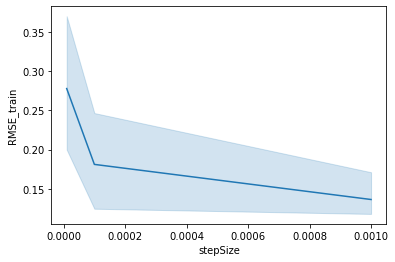

In [33]:
sns.lineplot(y="RMSE_train", x="stepSize", data=influenceOnRMSE)

<AxesSubplot:xlabel='iteration', ylabel='RMSE_train'>

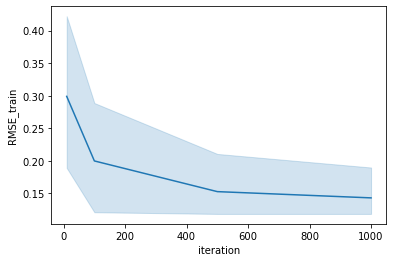

In [34]:
sns.lineplot(y="RMSE_train", x="iteration", data=influenceOnRMSE)

<AxesSubplot:xlabel='stepSize', ylabel='RMSE_test'>

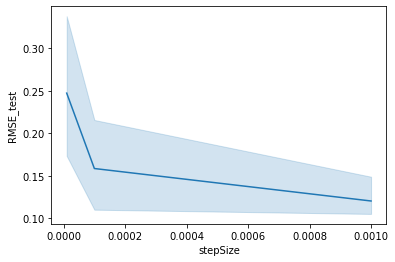

In [35]:
sns.lineplot(y="RMSE_test", x="stepSize", data=influenceOnRMSE)

<AxesSubplot:xlabel='iteration', ylabel='RMSE_test'>

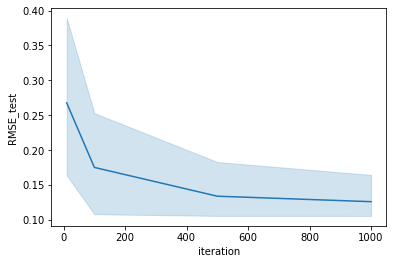

In [36]:
sns.lineplot(y="RMSE_test", x="iteration", data=influenceOnRMSE)